In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
import wrangle
import seaborn as sns
import scipy.stats as stats

# acquire
from env import host, user, password
from pydataset import data


# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

In [2]:
df = wrangle.new_zillow_data()
df.head(3)

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,1727539,NaN,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None


In [3]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    print(type(num_missing))
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing

def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

#### Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [4]:
def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # value_counts()
    # observation of nulls in the dataframe
    '''
    print('=====================================================')
    print('Dataframe head: ')
    print(df.head(3))
    print('=====================================================')
    print('Dataframe info: ')
    print(df.info())
    print('=====================================================')
    print('Dataframe Description: ')
    print(df.describe())
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    cat_cols = [col for col in df.columns if col not in num_cols]
    print('=====================================================')
    print('DataFrame value counts: ')
    for col in df.columns:
        if col in cat_cols:
            print(df[col].value_counts())
        else:
            print(df[col].value_counts(bins=10, sort=False))
    print('=====================================================')
    print('nulls in dataframe by column: ')
    print(nulls_by_col(df))
    print('=====================================================')
    print('nulls in dataframe by row: ')
    print(nulls_by_row(df))
    print('=====================================================')

In [5]:
summarize(df)

Dataframe head: 
   typeconstructiontypeid  storytypeid  propertylandusetypeid  \
0                     NaN          NaN                  261.0   
1                     NaN          NaN                  261.0   
2                     NaN          NaN                  261.0   

   heatingorsystemtypeid  buildingclasstypeid  architecturalstyletypeid  \
0                    NaN                  NaN                       NaN   
1                    NaN                  NaN                       NaN   
2                    NaN                  NaN                       NaN   

   airconditioningtypeid  parcelid       id  basementsqft  ...  \
0                    NaN  14297519  1727539           NaN  ...   
1                    NaN  17052889  1387261           NaN  ...   
2                    NaN  14186244    11677           NaN  ...   

   censustractandblock  logerror  transactiondate  airconditioningdesc  \
0         6.059063e+13  0.025595       2017-01-01                 None   
1       

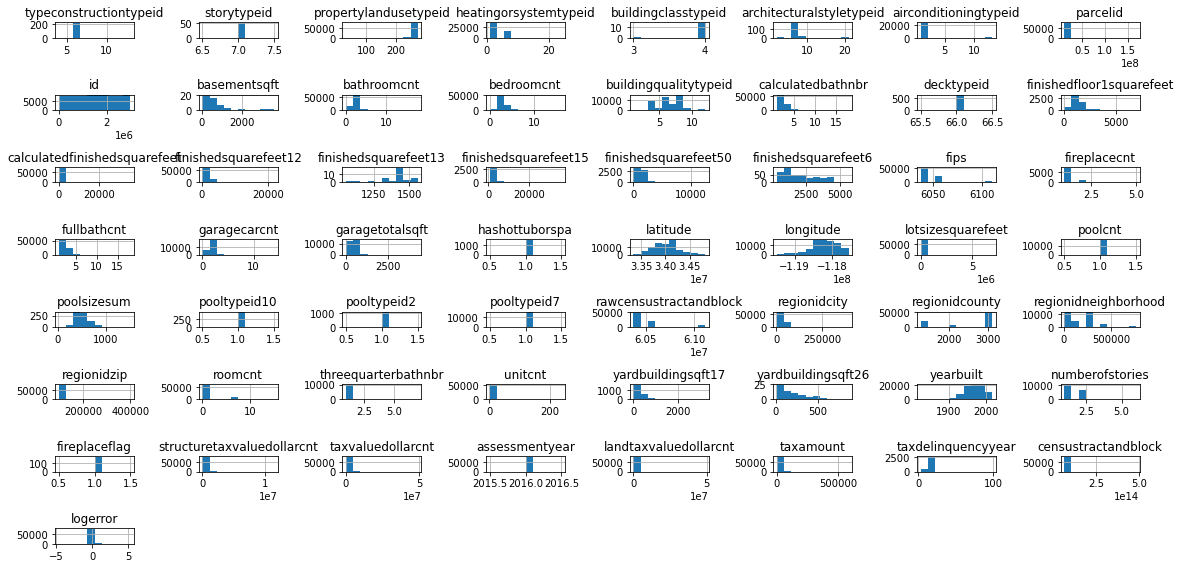

In [6]:
df.hist(figsize=(16, 8))
plt.tight_layout()
plt.show()

#### 3.  Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [7]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    print(type(num_missing))
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing

def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [8]:
nulls_by_col(df)

<class 'pandas.core.series.Series'>


,num_rows_missing,percent_rows_missing
typeconstructiontypeid,77352,99.713822
storytypeid,77524,99.935545
propertylandusetypeid,0,0.000000
heatingorsystemtypeid,28005,36.101013
buildingclasstypeid,77559,99.980664
architecturalstyletypeid,77368,99.734447
airconditioningtypeid,52568,67.764973
parcelid,0,0.000000
id,0,0.000000
basementsqft,77524,99.935545


In [9]:
nulls_by_row(df)

,num_cols_missing,percent_cols_missing,num_rows
0,23,33.82352941176471,2
1,24,35.294117647058826,13
2,25,36.76470588235294,24
3,26,38.23529411764706,65
4,27,39.705882352941174,316
5,28,41.17647058823529,457
6,29,42.64705882352941,5285
7,30,44.11764705882353,3465
8,31,45.588235294117645,9911
9,32,47.05882352941176,12606


### PREPARE

1.  Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [10]:
# define bedrooms between 1-5 for single unit

In [11]:
df = df.loc[(df['bathroomcnt'] > 0) & (df['bathroomcnt'] <= 3) & (df['bedroomcnt'] > 0) & (df['bedroomcnt'] <= 5)]   
df.head(3)

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,1387261,NaN,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,11677,NaN,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2288172,NaN,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None


In [12]:
df.bedroomcnt.value_counts()

3.0    29494
2.0    19156
4.0    14778
1.0     3384
5.0     2423
Name: bedroomcnt, dtype: int64

In [13]:
df.shape

(69235, 68)

2.  Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
    - Make use of inplace, i.e. inplace=True/False.

In [14]:
def handle_missing_values(df, prop_required_columns=0.5, prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index),0))
    df = df.dropna(axis=1, thresh=threshold)
#     threshold = int(round(prop_required_row * len(df.columns),0))
#     df = df.dropna(axis=0, thresh=threshold)
    return df

In [15]:
df = handle_missing_values(df)
df.shape

(69235, 34)

In [16]:
df.isnull().sum()

propertylandusetypeid               0
heatingorsystemtypeid           23768
parcelid                            0
id                                  0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           24201
calculatedbathnbr                  16
calculatedfinishedsquarefeet        9
finishedsquarefeet12             1973
fips                                0
fullbathcnt                        16
latitude                            0
longitude                           0
lotsizesquarefeet                7778
propertycountylandusecode           0
propertyzoningdesc              23871
rawcensustractandblock              0
regionidcity                     1205
regionidcounty                      0
regionidzip                        30
roomcnt                             0
unitcnt                         23838
yearbuilt                          46
structuretaxvaluedollarcnt         66
taxvaluedollarcnt                   1
assessmentye

3.  Decide how to handle the remaining missing values:
- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In [20]:
df = wrangle.split_continuous(df)

In [23]:
train, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)

In [24]:
train.shape, validate.shape, test.shape

AttributeError: 'list' object has no attribute 'shape'

### Mall Customers

1.  Acquire data from mall_customers.customers in mysql database.

In [18]:
mall_df = wrangle.get_mallcustomer_data()
mall_df.head(3)

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


2.  Summarize data (include distributions and descriptive statistics).

In [19]:
summarize(mall_df)

Dataframe head: 
             gender  age  annual_income  spending_score
customer_id                                            
1              Male   19             15              39
2              Male   21             15              81
3            Female   20             16               6
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
Dataframe Description: 
              age  annual_income  spending_score
count  200.000000     200.000000      200.000000
mean    38.850000      60.560000       50.200000
std     13.969007      26.264721       25.823522
min     18.000000      15.000000        1.0

3.  Detect outliers using IQR.

In [28]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

add_upper_outlier_columns(df, k=1.5)

mall_df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [29]:
mall_df.shape

(200, 4)

In [34]:
outlier_cols = [col for col in mall_df if col.endswith('_outliers')]
for col in outlier_cols:
    print('~~~\n' + col)
    data = mall_df[col][df[col] > 0]
    print(data.describe())

4.  Split data (train, validate, and test split).

In [35]:
def split_continuous(mall_df):
    '''
    Takes in a df
    Returns train, validate, and test DataFrames
    '''
    # Create train_validate and test datasets
    train_validate, test = train_test_split(df, 
                                        test_size=.2, 
                                        random_state=123)
    # Create train and validate datsets
    train, validate = train_test_split(train_validate, 
                                   test_size=.3, 
                                   random_state=123)
    return train, validate, test

In [38]:
# split the data in train, validate and test
train, test = train_test_split(mall_df, test_size = 0.2, random_state = 1349)
train, validate = train_test_split(train, test_size = 0.25, random_state = 1349)

In [39]:
#check the shape
train.shape, validate.shape, test.shape

((120, 4), (40, 4), (40, 4))

5.  Encode categorical columns using a one hot encoder (pd.get_dummies).

In [40]:
mall_df.head(3)

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


6.  Handles missing values.

7.  Scaling